# > The Sparks foundation
### Computer vision and Internet of Things


---



# > Task-2: Color Identification in Images
### Implement an image color detector which identifies all the colors in an image or video.






# > Author : Ashutosh kumar

## > Import Required Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from collections import Counter
import cv2

%matplotlib inline

# > Reading an Image

In [2]:
def get_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

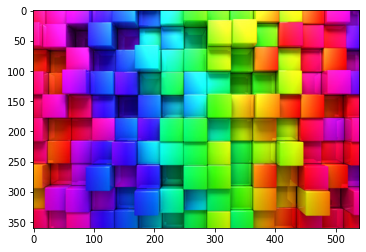

In [3]:
image = get_image("colours.jpg")
plt.imshow(image)

### Resize Image

In [4]:
image = cv2.resize(image, (600, 600))

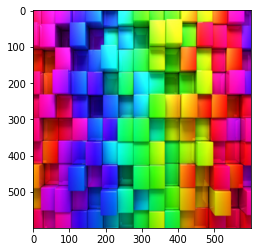

In [5]:
plt.imshow(image)

# > Creating a Matrix for K-Means Algorithm

In [6]:
print(type(image))
print(image)
print(image.shape)

<class 'numpy.ndarray'>
[[[255  25 111]
  [254  26 113]
  [255  26 116]
  ...
  [ 73   2 125]
  [ 73   1 127]
  [ 73   1 129]]

 [[255  25 111]
  [254  26 113]
  [255  26 116]
  ...
  [ 75   2 128]
  [ 74   1 130]
  [ 74   1 132]]

 [[255  25 111]
  [254  26 113]
  [255  26 116]
  ...
  [ 77   2 132]
  [ 77   1 135]
  [ 75   2 136]]

 ...

 [[215   1  53]
  [215   1  55]
  [215   0  57]
  ...
  [205   1  51]
  [205   1  52]
  [205   1  54]]

 [[214   0  52]
  [215   1  54]
  [215   0  56]
  ...
  [205   1  51]
  [205   1  53]
  [205   1  55]]

 [[214   0  52]
  [215   1  54]
  [215   0  56]
  ...
  [206   2  51]
  [206   2  53]
  [206   2  55]]]
(600, 600, 3)


In [7]:
# x is the matrix of features to be supplied to the KMeans Algorithm
x = image.reshape(image.shape[0]*image.shape[1],3)

In [8]:
x

array([[255,  25, 111],
       [254,  26, 113],
       [255,  26, 116],
       ...,
       [206,   2,  51],
       [206,   2,  53],
       [206,   2,  55]], dtype=uint8)

## > Building K-Means model 
##  To find top 5 prominent colors in the model.

In [9]:
kmeans = KMeans(n_clusters=8)

In [10]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
prominent_colors = kmeans.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[ 41 205  49]
 [228  31  46]
 [ 54  48 235]
 [199 212  20]
 [ 25 218 204]
 [216  13 193]
 [138  37  19]
 [ 27  43 112]]


Text(0.5, 1.0, 'Prominent Colors')

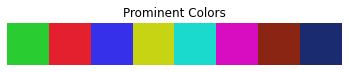

In [12]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

### > To get the order of prominency among colors

In [13]:
intensity_list = Counter(kmeans.labels_)
print(intensity_list)

Counter({1: 56788, 0: 55046, 2: 50551, 3: 48110, 5: 44656, 6: 38246, 7: 33411, 4: 33192})


In [14]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[1, 5, 2, 7, 4, 0, 3, 6]
[56788, 44656, 50551, 33411, 33192, 55046, 48110, 38246]


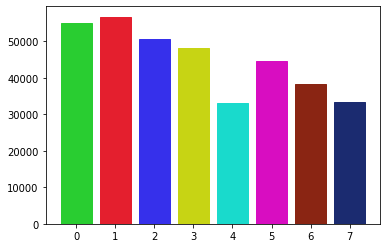

In [15]:
# Show the prominency levels on a bar graph
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
  s=bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)

## > Search Images using colors

In [16]:
# Enter the name of directory where images are stored
Dir_name = 'colors'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED':[128,0,0],
    'BLACK': [0,0,0],
    'WHITE': [255,255,255]
}

images = []

for file in os.listdir(Dir_name):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(Dir_name, file)))

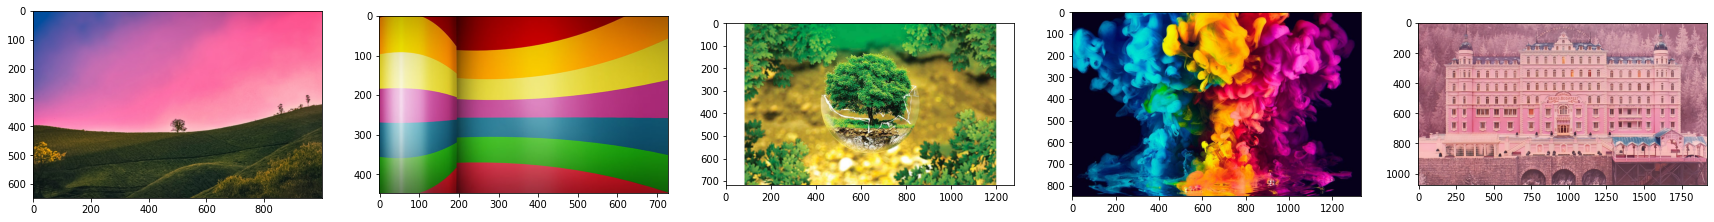

In [17]:
plt.figure(figsize=(30, 15))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [18]:
def get_colors(image,number_of_colors,show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  ordered_colors = [center_colors[i] for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  return rgb_colors

In [19]:
from skimage.color import rgb2lab, deltaE_cie76
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color,curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [20]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

# > Result
## Searching for Blue 

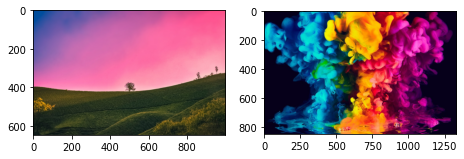

In [21]:
selected_color=COLORS['BLUE']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, 5)

## Searching for Green

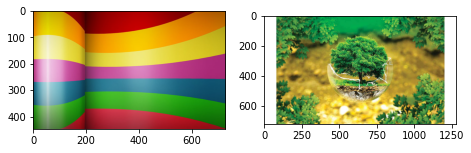

In [22]:
selected_color=COLORS['GREEN']
threshold=60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, 5)